In [1]:
import numpy as np
import matplotlib.pyplot as plt

V tomto sešitu budeme řešit Cauchyovu úlohu
$$y'=f(x,y),\qquad y(x_0)=y_0$$
na intervalu $\langle x_0,x_0+T\rangle$ pomocí různých numerických metod.

V následující buňce nastavíme pravou stranu $f$, počáteční podmínku $(x_0,y_0)$ a délku intervalu $T$. Rovněž nastavíme počet $n$ dílů, na které se interval rozdělí a vypočítáme krok $h=T/n$.

Nakonec v proměnná `x` bude obsahovat pole, ve kterém bude schovaná posloupnost $(x_i)_{i=0}^n$ s $x_i=x_0+ih$.

In [2]:
def f(x,y):
    return -y

x0=0
y0=13
T=5
n=10
h=T/n
x=np.linspace(x0,x0+T,n+1)

Nyní můžeme odhadnout řešení všemi možnými metodami, které jsme využili na přednášce. Pro připomenutí uvedeme stručně potřebné vzorce:
$$\eqalign{
y_{i+1}^{\rm Euler}&=y_i^{\rm Euler}+k_1h\cr
 y_{i+1}^{\rm Heun}&=y_i^{\rm Heun}+(k_1+k_2')h/2\cr
  y_{i+1}^{\rm RK2}&=y_i^{\rm RK2}+k_2h\cr
  y_{i+1}^{\rm RK4}&=y_i^{\rm RK4}+(k_1+2k_2+2k_3+k_4)h/6\cr
}$$
Zde se potřebné konstanty $k_j$ spočítají pomocí následujících vzorců (kde $y_i$ se vztahuje vždy k dané metodě)
$$\eqalign{
 k_1&=f(x_i,y_i)\cr
k_2'&=f(x_{i+1},y_i+k_1h)\cr
 k_2&=f(x_i+h/2,y_i+k_1h/2)\cr
 k_3&=f(x_i+h/2,y_i+k_2h/2)\cr
 k_4&=f(x_{i+1},y_i+k_3h)
}$$

In [3]:
yEuler=[y0];
for i in range(n):
    yEuler.append(yEuler[i]+f(x[i],yEuler[i])*h)
    
yHeun=[y0];
for i in range(n):
    k1=f(x[i],yHeun[i])
    k2=f(x[i+1],yHeun[i]+k1*h)
    yHeun.append(yHeun[i]+(k1+k2)*h/2)
    
yRK2=[y0];
for i in range(n):
    k1=f(x[i],yRK2[i])
    k2=f(x[i]+h/2,yRK2[i]+k1*h/2)
    yRK2.append(yRK2[i]+k2*h)
    
yRK4=[y0];
for i in range(n):
    k1=f(x[i],yRK4[i])
    k2=f(x[i]+h/2,yRK4[i]+k1*h/2)
    k3=f(x[i]+h/2,yRK4[i]+k2*h/2)
    k4=f(x[i+1],yRK4[i]+k3*h)
    yRK4.append(yRK4[i]+(k1+2*k2+2*k3+k4)*h/6)

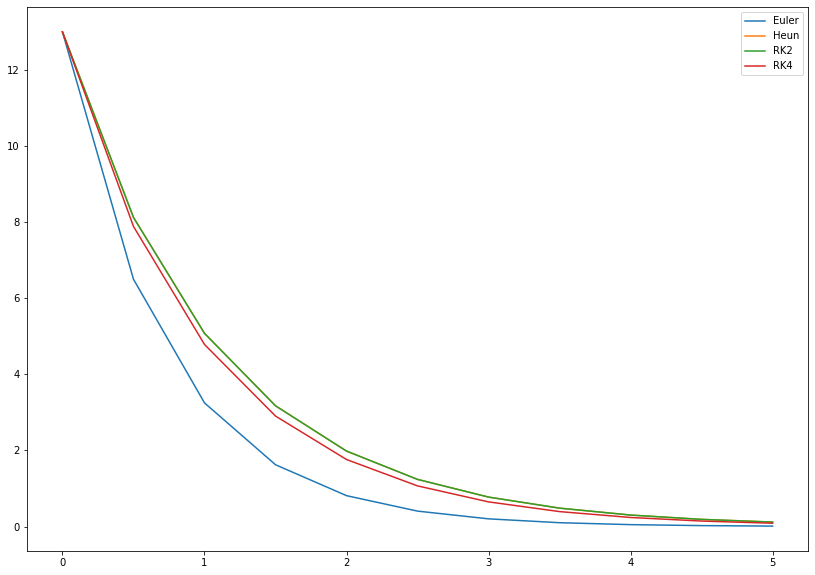

In [4]:
plt.figure(figsize=(14,10))
plt.plot(x,yEuler,label='Euler')
plt.plot(x,yHeun,label='Heun')
plt.plot(x,yRK2,label='RK2')
plt.plot(x,yRK4,label='RK4')
plt.legend()

Známe-li přesné analytické řešení, můžeme porovnat s numerickými výsledky a spočítat chybu:

Absolutní chyba Euler Eh= 1.5324327352287508
Absolutní chyba Heun  Eh= 0.2956922647712492
Absolutní chyba RK2   Eh= 0.2956922647712492
Absolutní chyba RK4   Eh= 0.00378823916360993


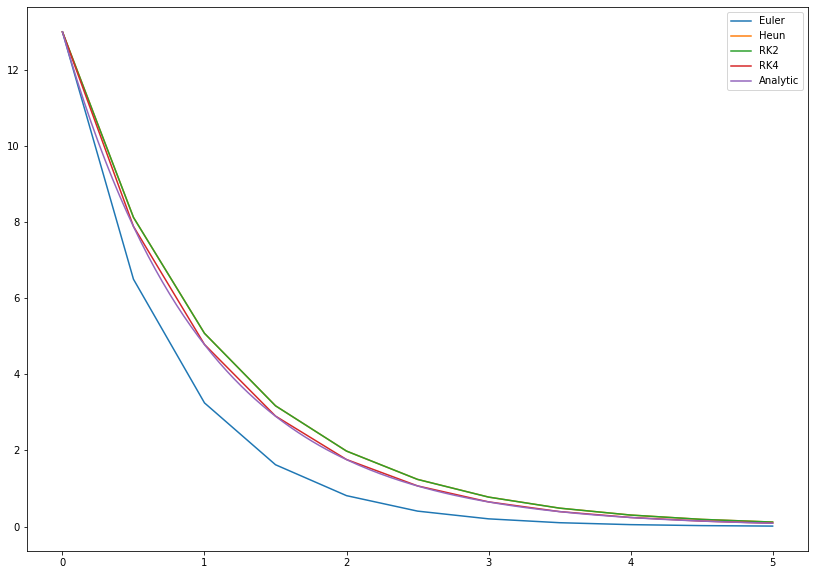

In [5]:
def yAnalytic(x):
    return(13*np.exp(-x))

xx=np.linspace(x0,x0+T,200)
yy=yAnalytic(xx)

plt.figure(figsize=(14,10))
plt.plot(x,yEuler,label='Euler')
plt.plot(x,yHeun,label='Heun')
plt.plot(x,yRK2,label='RK2')
plt.plot(x,yRK4,label='RK4')
plt.plot(xx,yy,label='Analytic')
plt.legend()

yExact=yAnalytic(x)
print("Absolutní chyba Euler Eh=",max(abs(yExact-yEuler)))
print("Absolutní chyba Heun  Eh=",max(abs(yExact-yHeun)))
print("Absolutní chyba RK2   Eh=",max(abs(yExact-yRK2)))
print("Absolutní chyba RK4   Eh=",max(abs(yExact-yRK4)))